In [55]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from utils.conn_data import load_pickle
from signals.TSM import TSM
from portfolio_tools.Diagnostics import Diagnostics

plt.style.use('ggplot')
plt.rcParams['lines.linewidth'] = 1.5

warnings.filterwarnings("ignore")

In [4]:
inputs_path = os.path.join(os.getcwd(), 'data', 'inputs')
instruments = [

    'SPY', 'IWM', 'EEM', 'TLT', 'USO', 'GLD', 'XLF',
    'XLB', 'XLK', 'XLV', 'XLI', 'XLU', 'XLY', 'XLP',
    'XLE', 'VIX', 'AGG', 'DBC', 'HYG', 'LQD','UUP'

]

## Strategy Inputs

In [5]:
name = "training_etfstsm_moskowitz"

etfstsm_moskowitz = load_pickle(os.path.join(inputs_path, name, f"{name}.pickle"))

etfstsm_moskowitz.keys()

dict_keys(['bars'])

In [6]:
etfstsm_moskowitz["bars"].keys()

dict_keys(['SPY', 'IWM', 'EEM', 'TLT', 'USO', 'GLD', 'XLF', 'XLB', 'XLK', 'XLV', 'XLI', 'XLU', 'XLY', 'XLP', 'XLE', 'VIX', 'AGG', 'DBC', 'HYG', 'LQD', 'UUP'])

In [7]:
bars = []
for instrument in instruments:
    bars.append(etfstsm_moskowitz["bars"][instrument].rename(columns={"Close": instrument}))
bars_df = pd.concat(bars, axis=1)

In [14]:
returns_info = []
for instrument in instruments:
    tmp_return = np.log(etfstsm_moskowitz["bars"][instrument][["Close"]]).diff().dropna()
    returns_info.append(tmp_return.rename(columns={'Close': f"{instrument}"}))

returns_info = pd.concat(returns_info, axis=1)

In [16]:
returns_info.head()

,SPY,IWM,EEM,TLT,USO,GLD,XLF,XLB,XLK,XLV,...,XLU,XLY,XLP,XLE,VIX,AGG,DBC,HYG,LQD,UUP
date,,,,,,,,,,,,,,,,,,,,,
2007-04-12,0.004434,0.006702,0.016581,0.000229,0.023309,-0.001343,-0.001686,0.008804,0.010529,0.011231,...,-0.004410,0.006970,0.001112,0.015189,-0.059560,0.001204,0.005886,0.000671,0.001504,-0.005934
2007-04-13,0.004552,0.006903,0.006037,-0.003094,-0.002520,0.012609,0.004210,0.002317,0.000838,0.014499,...,-0.000246,0.000772,0.003328,0.000476,-0.040953,-0.001605,0.005462,-0.001821,-0.001692,-0.000405
2007-04-16,0.009451,0.012817,0.011160,0.005495,-0.006231,0.008221,0.024079,0.013286,0.008337,0.009551,...,0.005877,0.009976,0.002212,0.005851,-0.018197,0.002006,-0.007813,-0.000384,0.000846,-0.004058
2007-04-17,0.002655,-0.002307,-0.005887,0.005578,-0.017933,-0.005865,-0.000276,-0.009435,0.002073,0.003070,...,0.004628,0.004064,0.009166,-0.005693,0.013267,0.002902,-0.010248,-0.000480,0.005437,-0.000407
2007-04-18,0.001223,-0.005852,-0.007635,0.004982,-0.002987,0.005573,0.011424,-0.005395,-0.002489,-0.000279,...,0.007264,-0.000761,-0.002558,-0.003495,0.022802,0.001498,0.000396,0.000288,0.000280,-0.001221


## Moskowitz Trend Signal

In [47]:
trend_signal = TSM()
window = 248

signals = []
for instrument in instruments:
    signal = trend_signal.Moskowitz(returns=returns_info[[instrument]], window=window)
    signals.append(signal)
signals_df = pd.concat(signals, axis=1)

forecasts = []
for instrument in instruments:
    forecast = np.where(signals_df[instrument] > 0, 1, -1)

    forecasts.append(pd.DataFrame(forecast, index=signals_df.index, columns=[instrument]))
forecasts_df = pd.concat(forecasts, axis=1)

In [48]:
signals_df.tail()

,SPY,IWM,EEM,TLT,USO,GLD,XLF,XLB,XLK,XLV,...,XLU,XLY,XLP,XLE,VIX,AGG,DBC,HYG,LQD,UUP
date,,,,,,,,,,,,,,,,,,,,,
2023-11-16,0.000481,-0.000157,0.000023,-0.000661,0.000020,0.000448,-0.000024,-0.000098,0.001287,-0.000300,...,-0.000518,0.000638,-0.000368,-0.000221,-0.001496,-0.000144,-0.000139,-0.000013,-0.000167,0.000139
2023-11-17,0.000545,-0.000040,0.000033,-0.000694,0.000328,0.000436,0.000032,-0.000055,0.001366,-0.000278,...,-0.000532,0.000728,-0.000348,-0.000030,-0.001912,-0.000148,-0.000017,0.000011,-0.000168,0.000114
2023-11-20,0.000582,-0.000005,0.000107,-0.000763,0.000514,0.000393,0.000065,-0.000039,0.001445,-0.000286,...,-0.000525,0.000773,-0.000368,-0.000015,-0.002119,-0.000177,0.000054,-0.000007,-0.000196,0.000115
2023-11-21,0.000542,-0.000086,0.000033,-0.000754,0.000587,0.000433,0.000059,-0.000053,0.001347,-0.000298,...,-0.000543,0.000724,-0.000377,-0.000006,-0.002067,-0.000161,0.000084,-0.000005,-0.000182,0.000132
2023-11-22,0.000588,-0.000011,0.000051,-0.000634,0.000526,0.000402,0.000086,-0.000010,0.001390,-0.000227,...,-0.000503,0.000754,-0.000317,0.000092,-0.002299,-0.000133,0.000044,0.000002,-0.000136,0.000137


In [49]:
forecasts_df.tail()

,SPY,IWM,EEM,TLT,USO,GLD,XLF,XLB,XLK,XLV,...,XLU,XLY,XLP,XLE,VIX,AGG,DBC,HYG,LQD,UUP
date,,,,,,,,,,,,,,,,,,,,,
2023-11-16,1,-1,1,-1,1,1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2023-11-17,1,-1,1,-1,1,1,1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,1,-1,1
2023-11-20,1,-1,1,-1,1,1,1,-1,1,-1,...,-1,1,-1,-1,-1,-1,1,-1,-1,1
2023-11-21,1,-1,1,-1,1,1,1,-1,1,-1,...,-1,1,-1,-1,-1,-1,1,-1,-1,1
2023-11-22,1,-1,1,-1,1,1,1,-1,1,-1,...,-1,1,-1,1,-1,-1,1,1,-1,1


Text(0.5, 1.0, 'Trend')

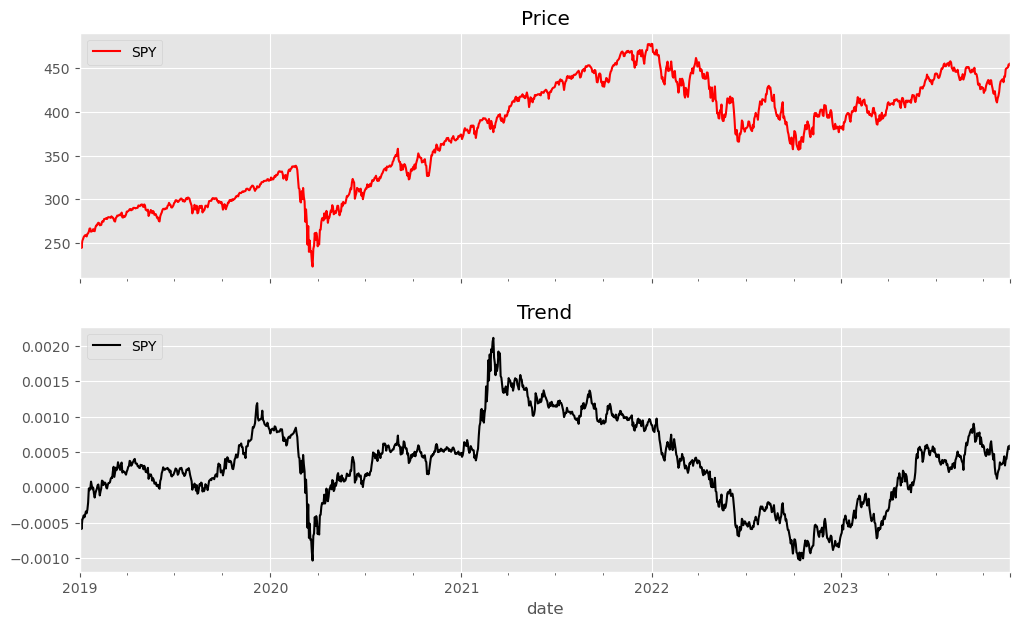

In [50]:
tickers = "SPY"
start_date = "2019-01-01"

# multiple plot price and signal
fig, ax = plt.subplots(2, 1, figsize=(12, 7), sharex=True)

bars_df[tickers].loc[start_date:].plot(ax=ax[0], color="red")

ax[0].legend(loc="upper left")
ax[0].set_title("Price")

signals_df[tickers].loc[start_date:].plot(ax=ax[1], color="black")

ax[1].legend(loc="upper left")
ax[1].set_title("Trend")

In [51]:
vol_target = 0.15
vol_window = 90
rets_df = returns_info.copy()
vols_df = returns_info.rolling(window=vol_window).std()

# compute vol scaling
vol_scale = vol_target / vols_df

# compute portfolio returns
portfolio_returns = (forecasts_df * rets_df.shift(-1)).fillna(0)

# compute scaled portfolio returns
scaled_portfolio_returns = (vol_scale / np.sqrt(252)) * portfolio_returns

<Axes: title={'center': 'Scaled Portfolio Returns'}, xlabel='date'>

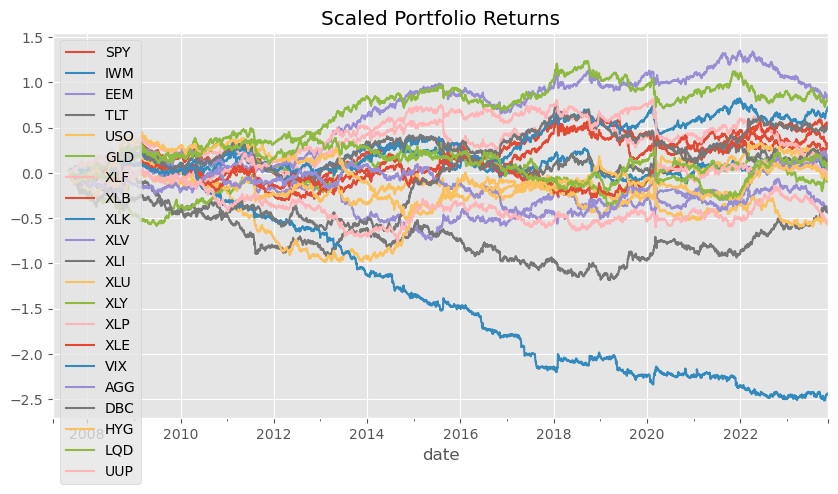

In [52]:
scaled_portfolio_returns.cumsum().plot(figsize=(10, 5), title="Scaled Portfolio Returns")

<Axes: title={'center': 'Scaled Portfolio Returns'}, xlabel='date'>

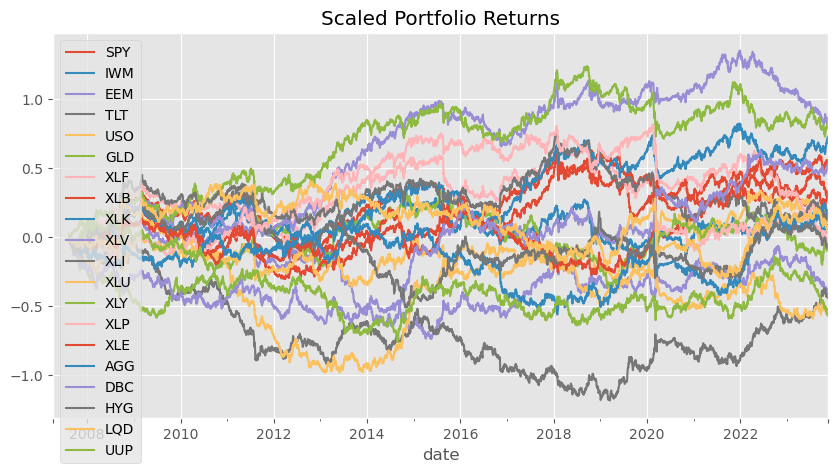

In [53]:
scaled_portfolio_returns.drop(["VIX"], axis=1).cumsum().plot(figsize=(10, 5), title="Scaled Portfolio Returns")

In [61]:
ret1 = scaled_portfolio_returns.mean(axis=1).dropna()
ret2 = scaled_portfolio_returns.drop(["VIX"], axis=1).mean(axis=1).dropna()

diag = Diagnostics()

metrics1 = pd.DataFrame([diag.compute_summary_statistics(portfolio_returns=ret1)])
metrics2 = pd.DataFrame([diag.compute_summary_statistics(portfolio_returns=ret2)])

metrics = pd.concat([metrics1, metrics2], axis=0)
metrics.index = ["All ETFs", "All ETFs Ex VIX"]

metrics

,E[R],Std(R),Sharpe,Sortino,AvgDD,MaxDD,% Positive Ret.
All ETFs,-0.009077,7.406769,-0.001225,-0.001535,-12.139405,-25.317151,0.504710
All ETFs Ex VIX,0.711073,7.595776,0.093614,0.117477,-9.292678,-23.958739,0.502355
